In [1]:
%pip install matplotlib numpy scikit-learn pandas torch torchvision seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import torch 
import torch.nn as nn
import torch.nn.functional as F

In [3]:
df = pd.read_csv("data/framingham.csv") #### read file to dataframe
len(df)

4238

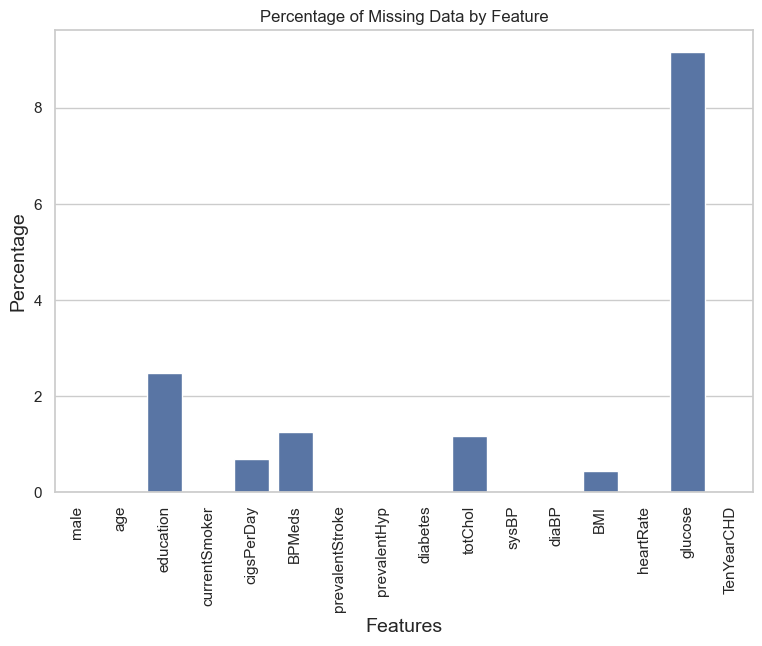

In [4]:
# Calculate the percentage of missing data for each feature
missing_data=df.isnull().sum()
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100
# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [5]:
df = df.dropna()
len(df)

3656

<Axes: >

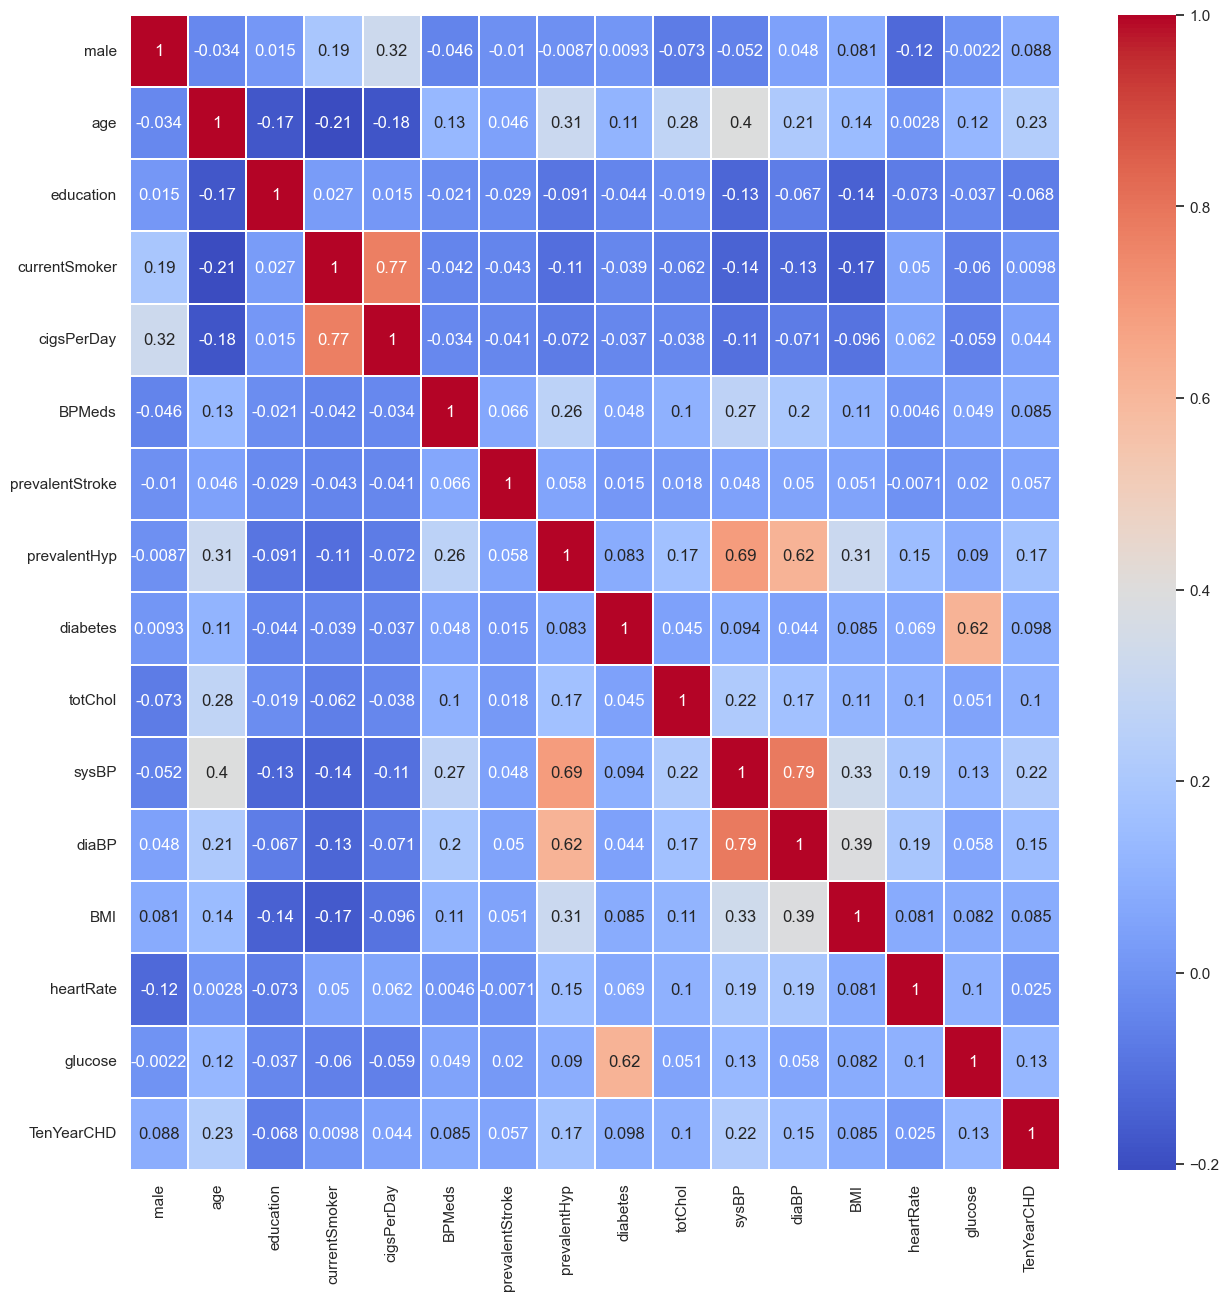

In [6]:
plt.figure(figsize=(15,15))
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.14, random_state=0)
train_data = pd.concat([X_train, y_train], axis=1)

sns.heatmap(train_data.corr(), annot=True, linewidths=0.1, cmap="coolwarm")

In [7]:
# imputer = SimpleImputer(strategy='most_frequent')

# new_train_data = pd.DataFrame(imputer.fit_transform(train_data))
# new_train_data.columns = train_data.columns
# new_train_data.index = train_data.index

# train_data.isnull().sum()
# new_train_data.isnull().sum()

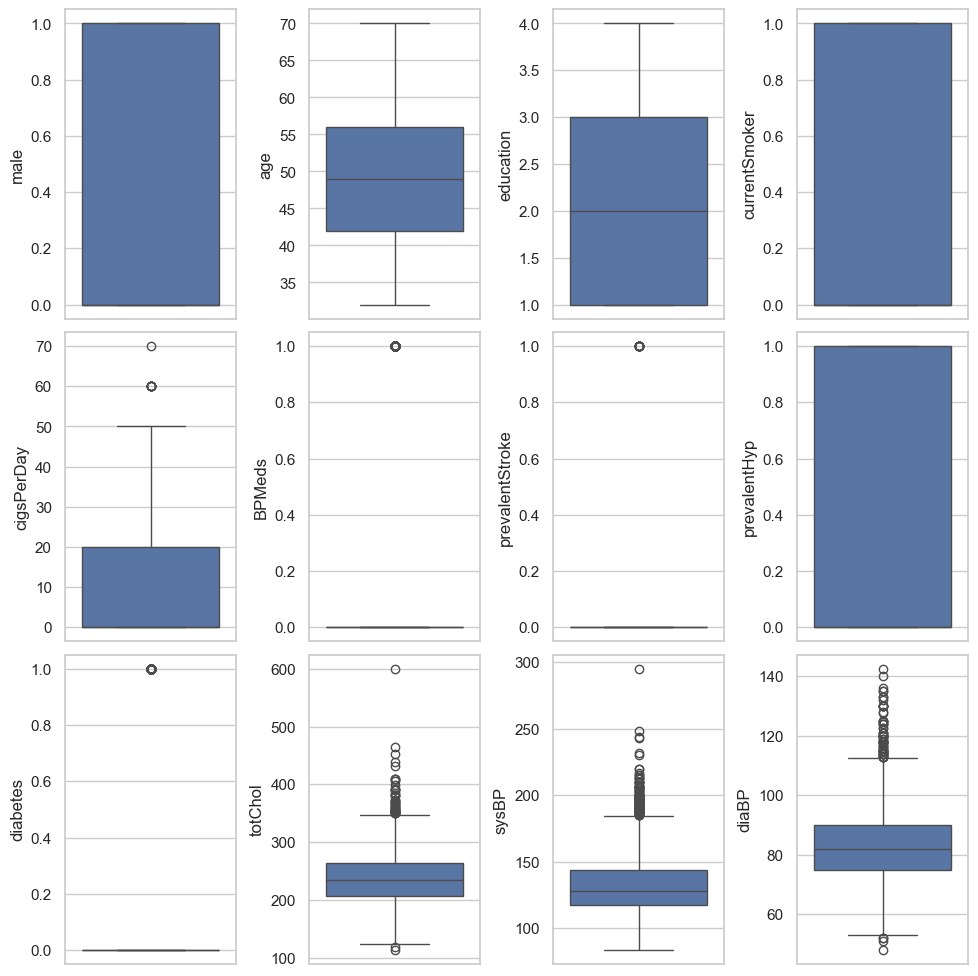

In [8]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

/var/folders/ph/xlc2myls7v920r9t3l9w51780000gn/T/ipykernel_27119/958863988.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


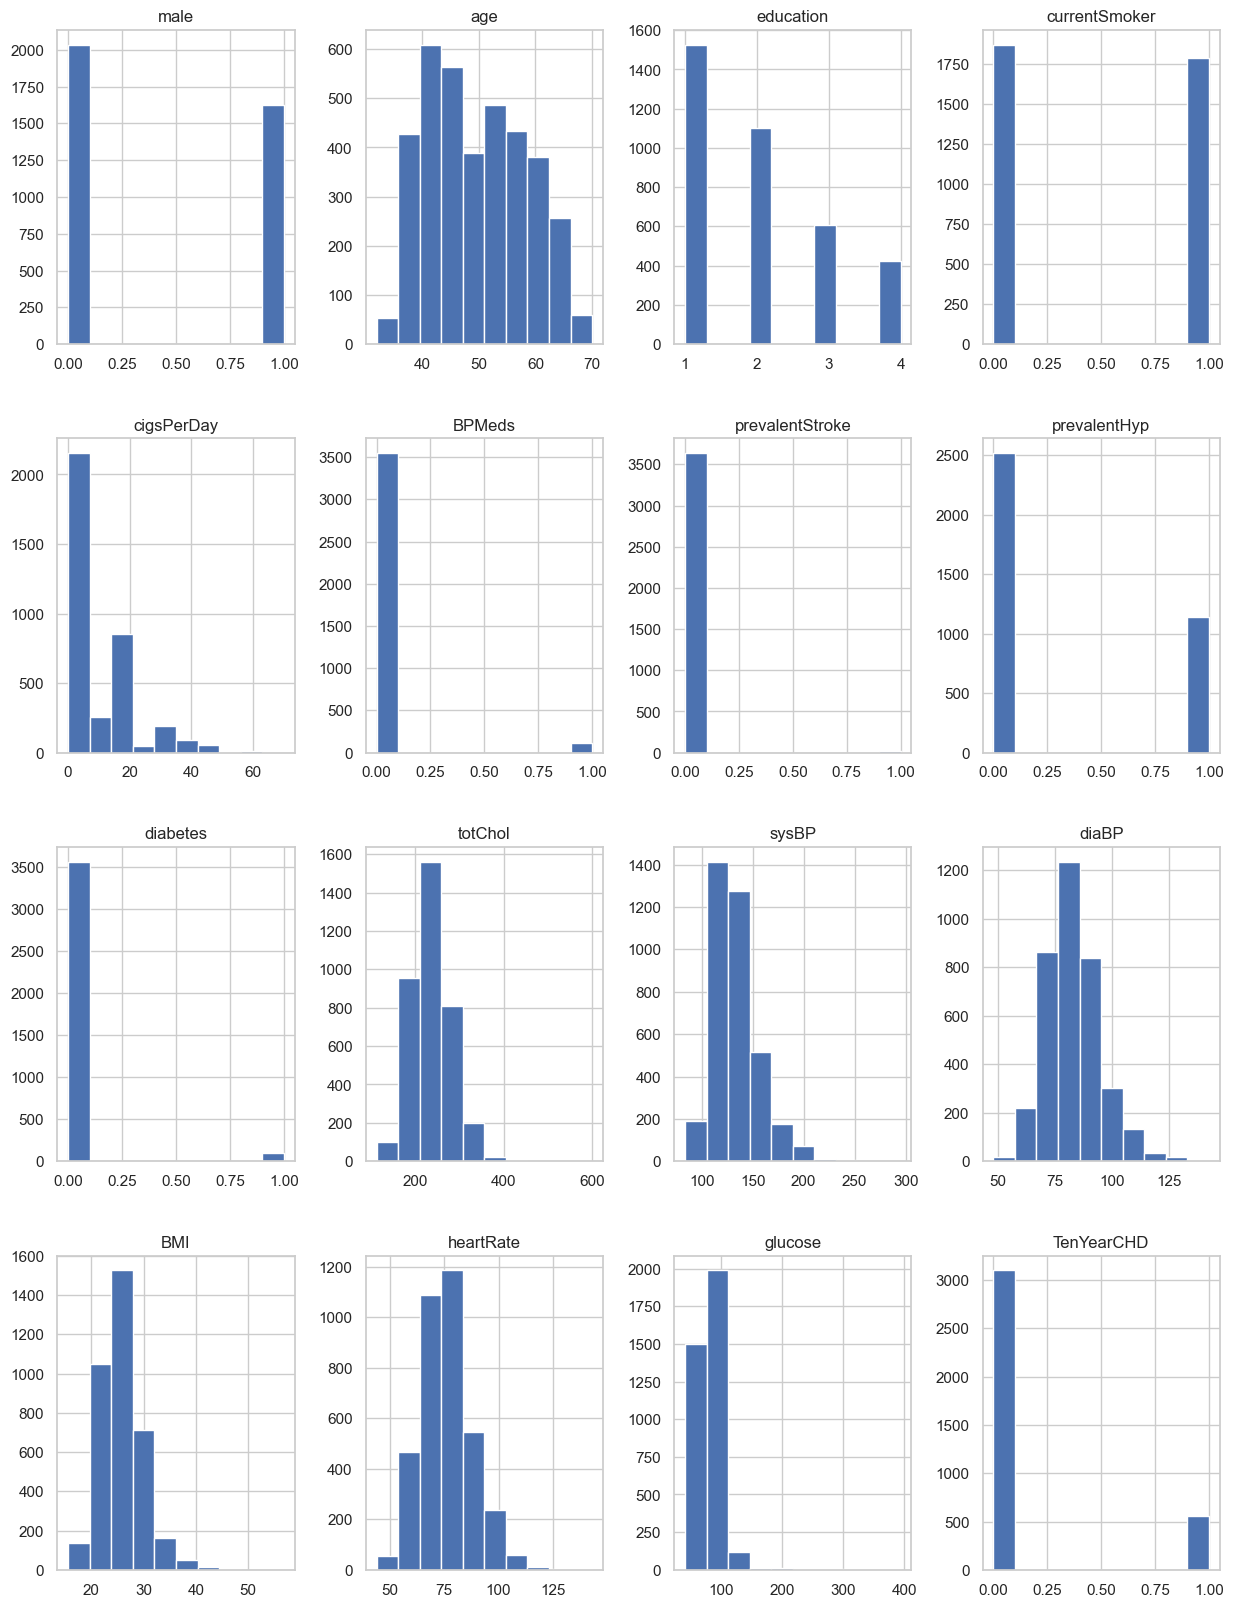

In [9]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
df.hist(ax = ax)
plt.show()

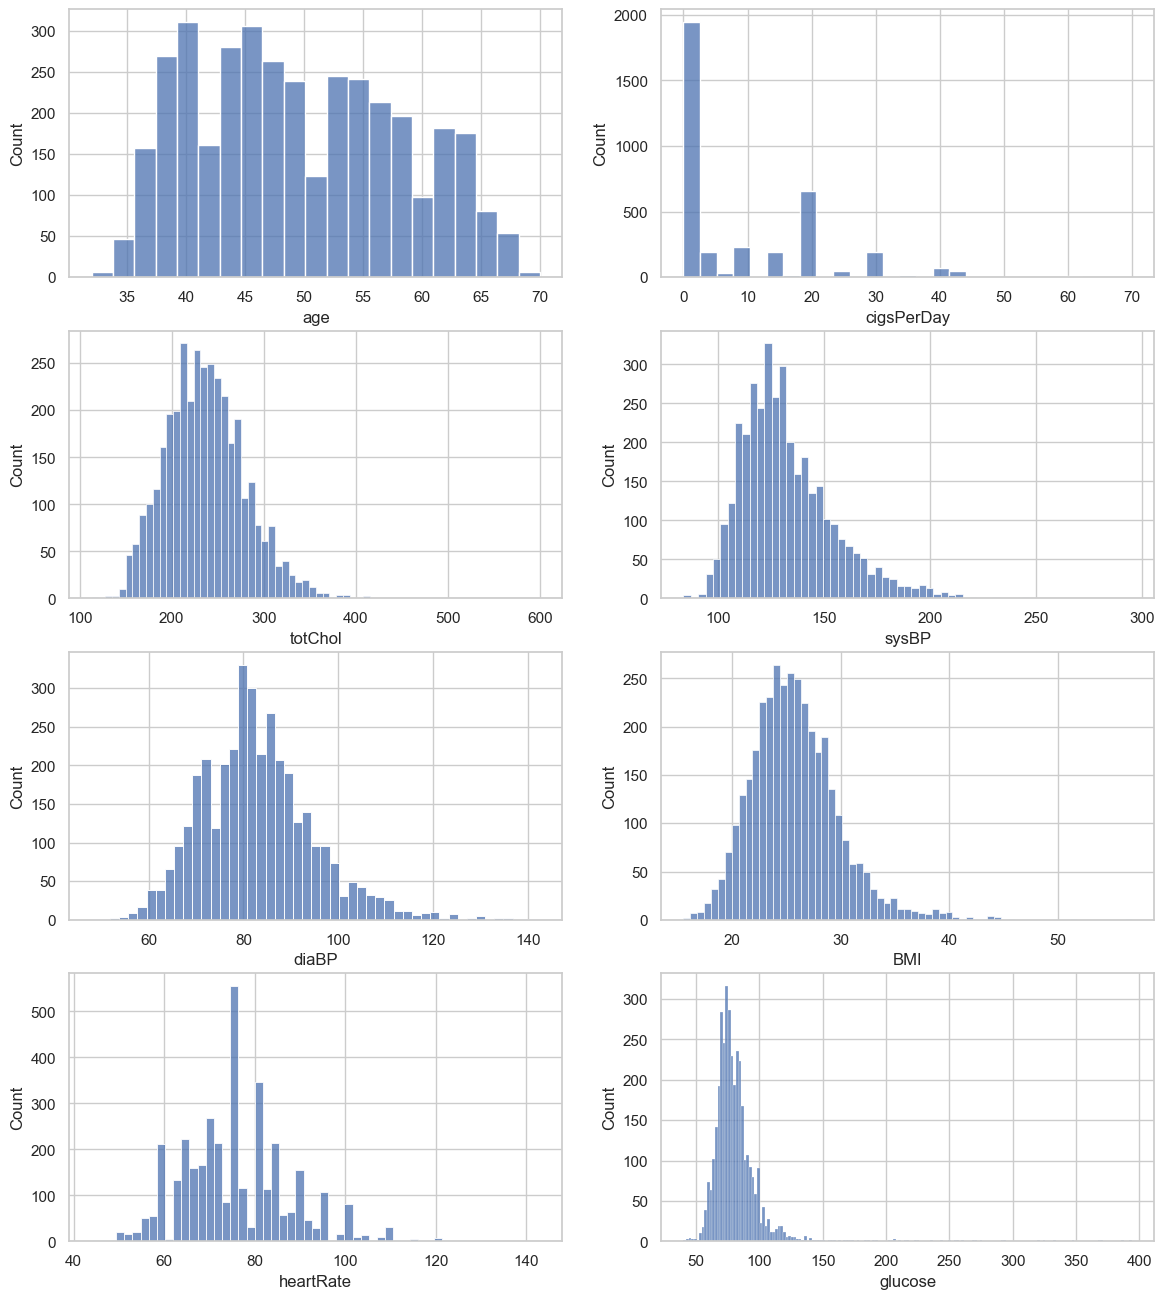

In [10]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0
numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

for col in numeric_features:
    sns.histplot(df[col], ax=axes[index1][index2])
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show()

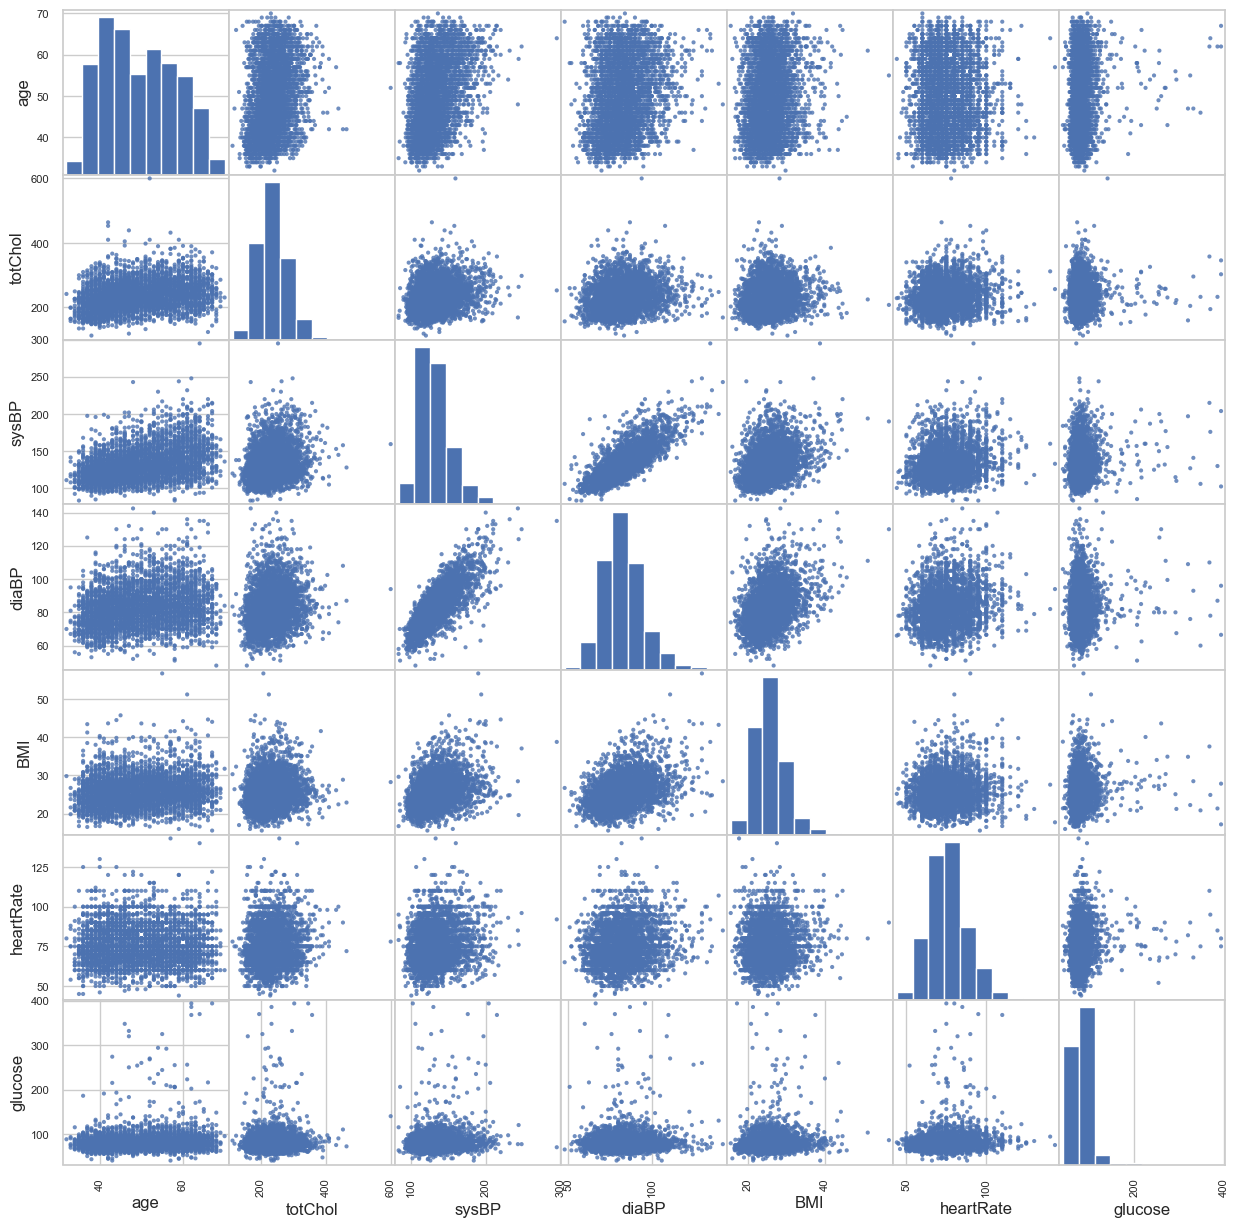

In [11]:
# Define the features you want to include in the scatter plot
selected_features = ['age', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']

# Create a scatter plot for the selected features
pd.plotting.scatter_matrix(df[selected_features], alpha=0.8, figsize=(15, 15), diagonal='hist')

# Show the plot
plt.show()

In [12]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Feature Scaling
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

#accuracy
log_accuracy = accuracy_score(y_test, y_pred)

<Axes: >

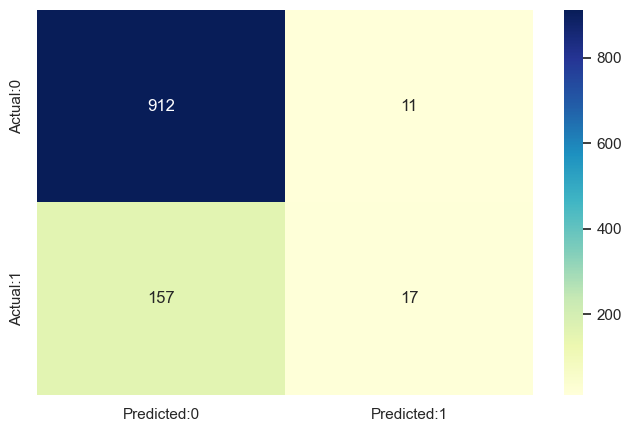

In [14]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [15]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1069
           1       0.10      0.61      0.17        28

    accuracy                           0.85      1097
   macro avg       0.54      0.73      0.54      1097
weighted avg       0.97      0.85      0.90      1097



In [16]:
dt_clf = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [17]:
#accuracy
tree_accuracy = accuracy_score(y_test,y_pred_dt)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 80.95%


<Axes: >

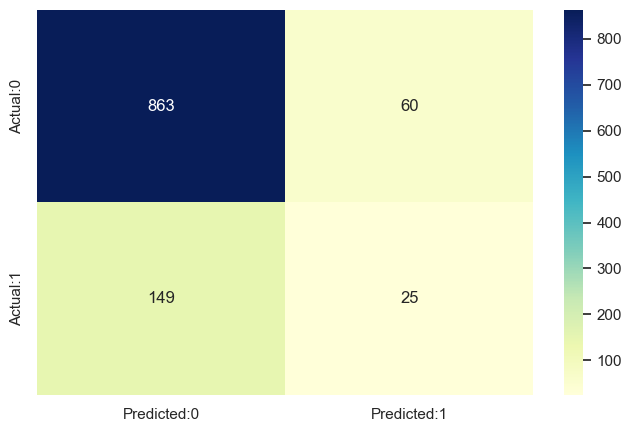

In [18]:
cm=confusion_matrix(y_test,y_pred_dt)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [19]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       923
           1       0.29      0.14      0.19       174

    accuracy                           0.81      1097
   macro avg       0.57      0.54      0.54      1097
weighted avg       0.76      0.81      0.78      1097



In [20]:
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split=10,random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [21]:
#accuracy
rf_accuracy = accuracy_score(y_test,y_pred_rf)
print(f"Using Random Forest we get an accuracy of {round(rf_accuracy*100,2)}%")

Using Random Forest we get an accuracy of 84.23%


<Axes: >

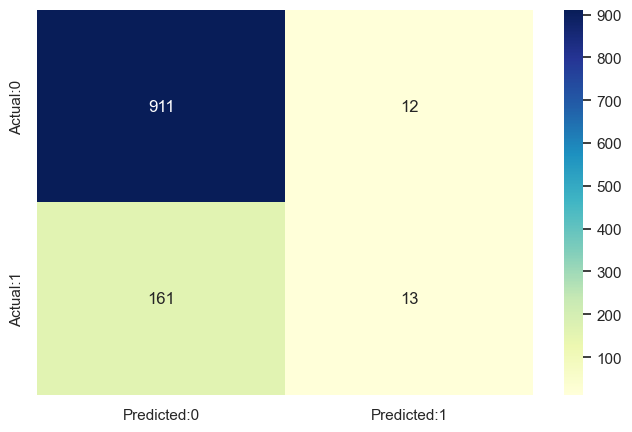

In [22]:
cm=confusion_matrix(y_test,y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [23]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       923
           1       0.52      0.07      0.13       174

    accuracy                           0.84      1097
   macro avg       0.68      0.53      0.52      1097
weighted avg       0.80      0.84      0.79      1097



In [24]:
logistic_f1 = f1_score(y_test, y_pred)
tree_f1 = f1_score(y_test, y_pred_dt)
rf_f1=f1_score(y_test, y_pred_rf)

comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'F1 score':logistic_f1},
    "Decision trees":{'Accuracy':tree_accuracy,  'F1 score':tree_f1},
    "Random Forest Classifier":{'Accuracy':rf_accuracy,  'F1 score':rf_f1},
}).T
comparison


,Accuracy,F1 score
Logistic regression,0.846855,0.168317
Decision trees,0.809480,0.193050
Random Forest Classifier,0.842297,0.130653


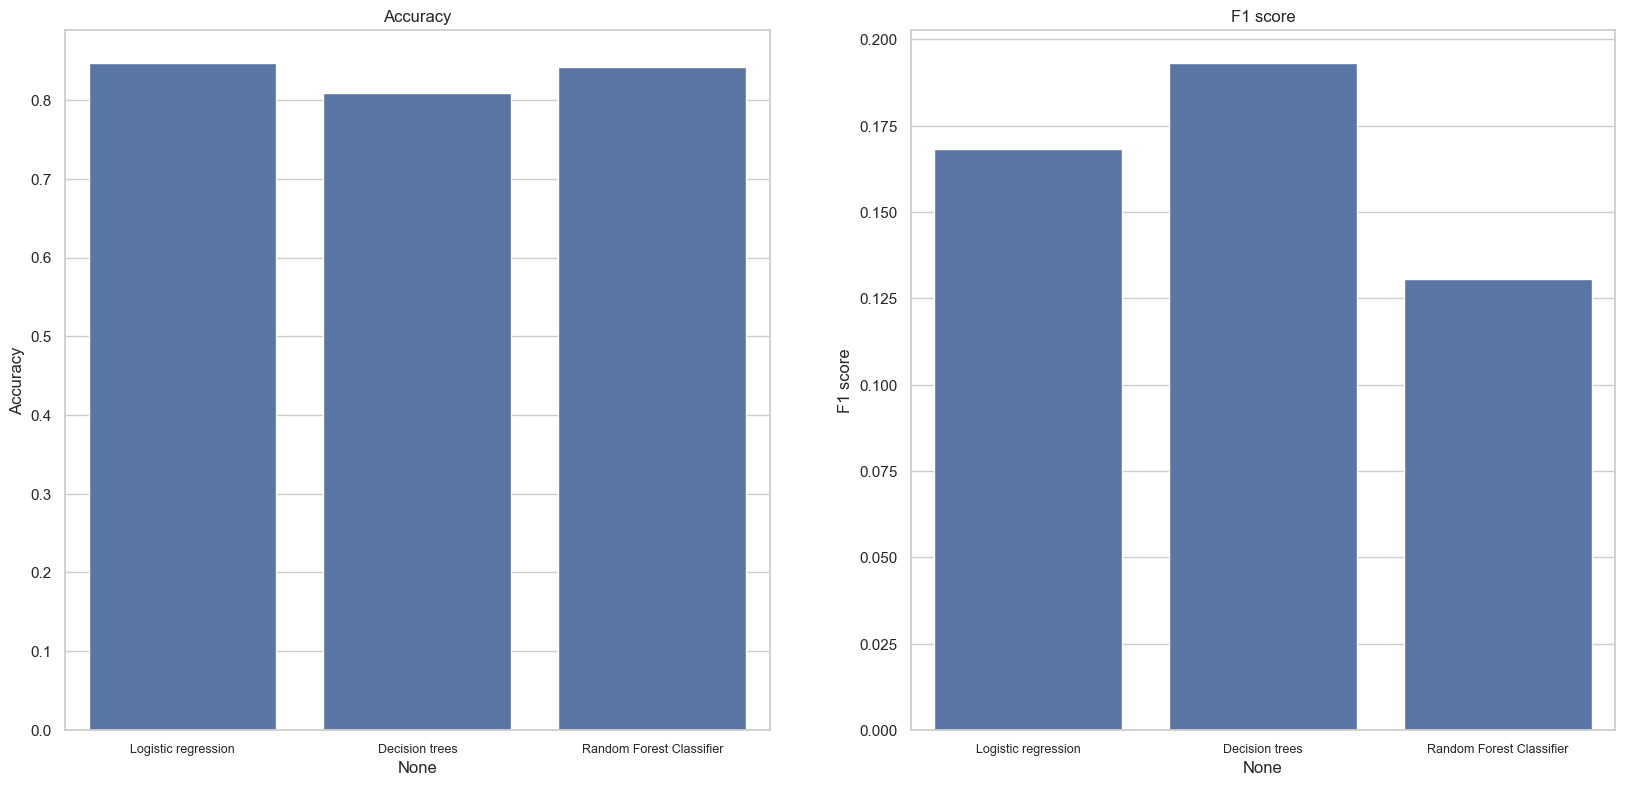

In [25]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
titles = ['Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

In [26]:
dataframe = pd.read_csv("data/framingham.csv") #### read file to dataframe
dataframe = dataframe.dropna()
print("number of data: ", len(dataframe)) 

number of data:  3656


In [27]:
###### from that => imbalace data
have_disease = dataframe[dataframe['TenYearCHD'] == 1]
nohave_disease = dataframe[dataframe['TenYearCHD'] == 0]
total_records = len(dataframe)
number_records_dis = len(have_disease)
number_records_nodis = len(nohave_disease)
print("we got total "+str(total_records)+" records")
print(str(number_records_nodis)+" records have not heart disease")
print(str(number_records_dis)+" records have heart disease")

we got total 3656 records
3099 records have not heart disease
557 records have heart disease


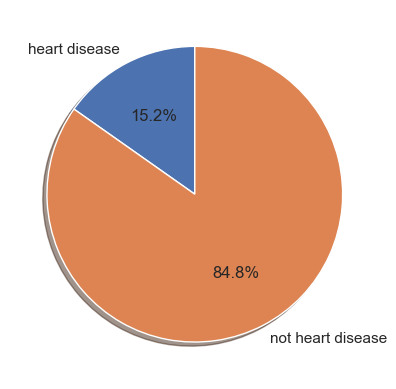

<Figure size 640x480 with 0 Axes>

In [28]:
labels = 'heart disease', 'not heart disease'
sizes = [number_records_dis/total_records, number_records_nodis/total_records]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

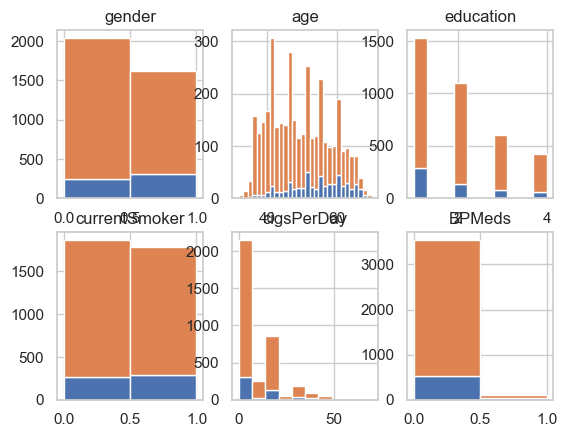

In [29]:
plt.clf()

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)
ax0.hist((have_disease['male'], nohave_disease['male']), 2, histtype='bar', stacked=True)
ax0.set_title('gender')
ax1.hist((have_disease['age'], nohave_disease['age']),30 , histtype='bar', stacked=True)
ax1.set_title('age')
ax2.hist((have_disease['education'], nohave_disease['education']), histtype='bar', stacked=True)
ax2.set_title('education')
ax3.hist((have_disease['currentSmoker'], nohave_disease['currentSmoker']), 2, histtype='bar', stacked=True)
ax3.set_title('currentSmoker')
ax4.hist((have_disease['cigsPerDay'], nohave_disease['cigsPerDay']), histtype='bar', stacked=True)
ax4.set_title('cigsPerDay')
ax5.hist((have_disease['BPMeds'], nohave_disease['BPMeds']), 2 , histtype='bar', stacked=True)
ax5.set_title('BPMeds')
plt.show()

<Figure size 640x480 with 0 Axes>

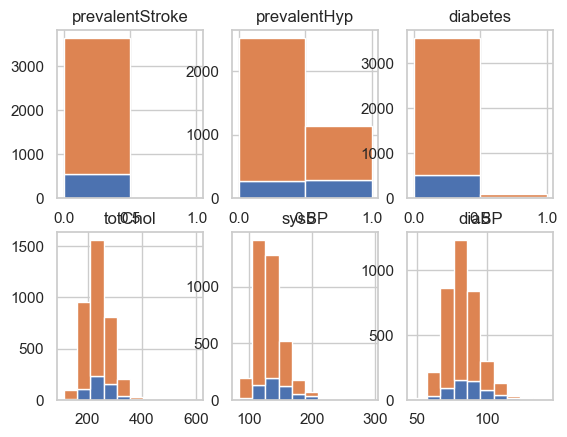

In [30]:
plt.clf()

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)
ax0.hist((have_disease['prevalentStroke'], nohave_disease['prevalentStroke']), 2, histtype='bar', stacked=True)
ax0.set_title('prevalentStroke')
ax1.hist((have_disease['prevalentHyp'], nohave_disease['prevalentHyp']), 2, histtype='bar', stacked=True)
ax1.set_title('prevalentHyp')
ax2.hist((have_disease['diabetes'], nohave_disease['diabetes']),2, histtype='bar', stacked=True)
ax2.set_title('diabetes')
ax3.hist((have_disease['totChol'], nohave_disease['totChol']), histtype='bar', stacked=True)
ax3.set_title('totChol')
ax4.hist((have_disease['sysBP'], nohave_disease['sysBP']), histtype='bar', stacked=True)
ax4.set_title('sysBP')
ax5.hist((have_disease['diaBP'], nohave_disease['diaBP']), histtype='bar', stacked=True)
ax5.set_title('diaBP')
plt.show()

<Figure size 640x480 with 0 Axes>

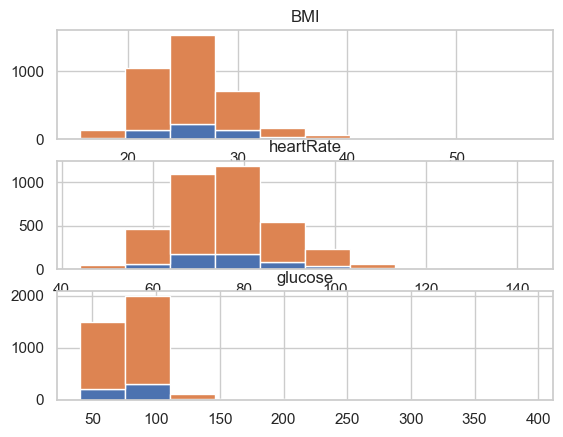

In [31]:
plt.clf()

fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=3)
ax0.hist((have_disease['BMI'], nohave_disease['BMI']), histtype='bar', stacked=True)
ax0.set_title('BMI')
ax1.hist((have_disease['heartRate'], nohave_disease['heartRate']), histtype='bar', stacked=True)
ax1.set_title('heartRate')
ax2.hist((have_disease['glucose'], nohave_disease['glucose']), histtype='bar', stacked=True)
ax2.set_title('glucose')
plt.show()

In [32]:
def normalize(dataframe, names):
    max_e, min_e = max(dataframe[names]), min(dataframe[names]) 
    print(names, max(dataframe[names]), min(dataframe[names]))
    dataframe[names] = (dataframe[names] - min_e) / (max_e - min_e)
    # print("after: ", max(dataframe[names]), min(dataframe[names]))
    return dataframe

dataframe = normalize(dataframe, 'male')
dataframe = normalize(dataframe, 'age')
dataframe = normalize(dataframe, 'education')
dataframe = normalize(dataframe, 'currentSmoker')
dataframe = normalize(dataframe, 'cigsPerDay')
dataframe = normalize(dataframe, 'BPMeds')
dataframe = normalize(dataframe, 'prevalentStroke')
dataframe = normalize(dataframe, 'prevalentHyp')
dataframe = normalize(dataframe, 'diabetes')
dataframe = normalize(dataframe, 'totChol')
dataframe = normalize(dataframe, 'sysBP')
dataframe = normalize(dataframe, 'diaBP')
dataframe = normalize(dataframe, 'BMI')
dataframe = normalize(dataframe, 'heartRate')
dataframe = normalize(dataframe, 'glucose')

male 1 0
age 70 32
education 4.0 1.0
currentSmoker 1 0
cigsPerDay 70.0 0.0
BPMeds 1.0 0.0
prevalentStroke 1 0
prevalentHyp 1 0
diabetes 1 0
totChol 600.0 113.0
sysBP 295.0 83.5
diaBP 142.5 48.0
BMI 56.8 15.54
heartRate 143.0 44.0
glucose 394.0 40.0


In [33]:
#### turn to numpy array 
trainval = dataframe.sample(frac=0.9)
train = trainval.sample(frac=0.8)
val = trainval.drop(train.index).to_numpy()
test = dataframe.drop(trainval.index).to_numpy()
train = train.to_numpy()
x_train, y_train = train[..., :15], train[..., 15]
x_val, y_val = val[..., :15], val[..., 15]
x_test, y_test = test[..., :15], test[..., 15]

In [34]:
####### machine learning approach SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.8278688524590164


In [35]:
#### LinearSVC 
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(penalty='l2'))
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))
with open('LG.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('LG.pkl', 'rb') as f:
    clf2 = pickle.load(f)

x = np.random.rand(1, 15)
y = clf2.predict(x)
print(y)

0.8333333333333334
[1.]


In [36]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.8278688524590164


In [37]:


clf = make_pipeline(StandardScaler(),
                    LogisticRegression(penalty='l2'))
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))
with open('LG.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('LG.pkl', 'rb') as f:
    clf2 = pickle.load(f)

x = np.random.rand(1, 15)
y = clf2.predict(x)
print(y)

0.8333333333333334
[1.]


In [38]:
### DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.7595628415300546


In [39]:
#### DecisionTreeRegressor
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.76775956284153


In [40]:
### Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8169398907103825


In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 32)  
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 64)
        self.classify = nn.Linear(64, 2)

    def forward(self, input):
        x = F.relu(self.fc1(input))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.classify(x)
        return x

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.classify = nn.Linear(15, 1)
    def forward(self, input):
        return F.sigmoid(self.classify(input))

In [42]:
model = LogisticRegression()
loss_b = torch.nn.L1Loss()
EPOCHS = 100
best_loss = float('inf')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(EPOCHS):
    running_loss = 0.0
    optimizer.zero_grad()
    y_pred = model(torch.from_numpy(x_train).float()) 
    loss = loss_b(y_pred, torch.from_numpy(y_train).long())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print("at epoch ", epoch, ' loss: ', running_loss)
    ### validate
    if running_loss < best_loss:
            best_loss = running_loss
            torch.save(model.state_dict(), 'weight/rg_best.pt')

/Users/longnguyen/.pyenv/versions/3.12.4/lib/python3.12/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2632])) that is different to the input size (torch.Size([2632, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


at epoch  0  loss:  0.49158886075019836
at epoch  1  loss:  0.4915204644203186
at epoch  2  loss:  0.491390585899353
at epoch  3  loss:  0.4912053048610687
at epoch  4  loss:  0.4909701645374298
at epoch  5  loss:  0.4906902611255646
at epoch  6  loss:  0.4903699457645416
at epoch  7  loss:  0.49001339077949524
at epoch  8  loss:  0.48962414264678955
at epoch  9  loss:  0.48920562863349915
at epoch  10  loss:  0.48876065015792847
at epoch  11  loss:  0.48829197883605957
at epoch  12  loss:  0.4878018796443939
at epoch  13  loss:  0.48729273676872253
at epoch  14  loss:  0.4867662191390991
at epoch  15  loss:  0.48622432351112366
at epoch  16  loss:  0.48566848039627075
at epoch  17  loss:  0.4851000905036926
at epoch  18  loss:  0.4845206141471863
at epoch  19  loss:  0.4839310348033905
at epoch  20  loss:  0.48333248496055603
at epoch  21  loss:  0.4827257990837097
at epoch  22  loss:  0.4821119010448456
at epoch  23  loss:  0.4814915657043457
at epoch  24  loss:  0.4808654487133026
a

In [43]:
model.load_state_dict(torch.load('weight/rg_best.pt', weights_only=False))
model.eval()
predict = torch.where(model(torch.from_numpy(x_test).float()) > 0.5, 1, 0) 
predict = torch.argmax(predict, dim=1).cpu().numpy()
print(accuracy_score(predict, y_test))

0.8333333333333334


In [44]:
model = Net()
loss_b = torch.nn.CrossEntropyLoss()
EPOCHS = 100
best_loss = float('inf')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(EPOCHS):
    running_loss = 0.0
    optimizer.zero_grad()
    y_pred = model(torch.from_numpy(x_train).float()) 
    loss = loss_b(y_pred, torch.from_numpy(y_train).long())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print("at epoch ", epoch, ' loss: ', running_loss)
    ### validate
    loss_val = 0.0
    with torch.no_grad():
        y_pred = model(torch.from_numpy(x_val).float()) 
        loss_v_b = loss_b(y_pred, torch.from_numpy(y_val).long())
        loss_val += loss_v_b
        if loss_val < best_loss:
            best_loss = loss_val
            torch.save(model.state_dict(), 'weight/best.pt')

at epoch  0  loss:  0.7167437672615051
at epoch  1  loss:  0.7163624167442322
at epoch  2  loss:  0.7156391739845276
at epoch  3  loss:  0.7146099805831909
at epoch  4  loss:  0.7133087515830994
at epoch  5  loss:  0.7117659449577332
at epoch  6  loss:  0.7100096940994263
at epoch  7  loss:  0.7080655694007874
at epoch  8  loss:  0.7059573531150818
at epoch  9  loss:  0.7037061452865601
at epoch  10  loss:  0.7013310194015503
at epoch  11  loss:  0.6988493204116821
at epoch  12  loss:  0.6962770819664001
at epoch  13  loss:  0.6936280727386475
at epoch  14  loss:  0.6909151673316956
at epoch  15  loss:  0.6881505846977234
at epoch  16  loss:  0.6853444576263428
at epoch  17  loss:  0.6825054287910461
at epoch  18  loss:  0.6796422004699707


at epoch  19  loss:  0.6767621040344238
at epoch  20  loss:  0.6738713383674622
at epoch  21  loss:  0.6709758043289185
at epoch  22  loss:  0.6680806875228882
at epoch  23  loss:  0.6651900410652161
at epoch  24  loss:  0.6623086333274841
at epoch  25  loss:  0.6594393849372864
at epoch  26  loss:  0.6565855741500854
at epoch  27  loss:  0.6537500023841858
at epoch  28  loss:  0.6509348750114441
at epoch  29  loss:  0.6481422185897827
at epoch  30  loss:  0.6453739404678345
at epoch  31  loss:  0.6426312923431396
at epoch  32  loss:  0.6399157643318176
at epoch  33  loss:  0.6372280716896057
at epoch  34  loss:  0.6345692276954651
at epoch  35  loss:  0.6319397687911987
at epoch  36  loss:  0.6293398141860962
at epoch  37  loss:  0.6267699599266052
at epoch  38  loss:  0.624230146408081
at epoch  39  loss:  0.6217206716537476
at epoch  40  loss:  0.61924147605896
at epoch  41  loss:  0.6167927980422974
at epoch  42  loss:  0.614374577999115
at epoch  43  loss:  0.6119864583015442
at e

In [45]:
model.load_state_dict(torch.load('weight/best.pt', weights_only=False))
model.eval()
predict = F.softmax(model(torch.from_numpy(x_test).float()), dim=1)
predict = torch.argmax(predict, dim=1).cpu().numpy()
print(accuracy_score(predict, y_test))

0.8333333333333334
